In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Task 1a)

In [7]:
import utils

path = os.getcwd()
t_daily = utils.munich_station_daily(location=path, to_xarray = True)
t_daily

<xarray.Dataset>
Dimensions:   (time: 23955)
Coordinates:
  * time      (time) datetime64[ns] 1954-06-01 1954-06-02 ... 2019-12-31
Data variables:
    t_mean    (time) float64 14.0 13.2 16.6 15.2 15.2 ... 3.7 -0.1 -1.6 0.0 3.0
    t_max     (time) float64 17.6 19.7 21.9 17.3 17.7 ... 4.9 2.0 2.5 6.0 8.6
    t_min     (time) float64 10.4 9.7 8.2 11.8 13.7 ... 1.7 -2.1 -4.8 -4.4 -0.5
    precip    (time) float64 0.0 0.5 0.0 1.2 6.0 2.3 ... 1.5 4.9 0.0 0.0 0.0 0.0
    pressure  (time) float64 -999.0 -999.0 -999.0 -999.0 ... 974.7 970.9 969.5

**Numpy functions:**

In [8]:
# generate data (for demonstration purpose)
data = np.random.normal(size=(1_000))
print("data.shape", data.shape)

two_by_thress_samples = np.random.choice(data, size=(2,3))
print("two_by_thress_samples.shape", two_by_thress_samples.shape)

mean_along_0th_axis = np.mean(two_by_thress_samples, axis=0)
print("mean_along_0th_axis.shape", mean_along_0th_axis.shape)

data.shape (1000,)
two_by_thress_samples.shape (2, 3)
mean_along_0th_axis.shape (3,)


Task 1b)

In [9]:
cats_and_dogs = t_daily.where(t_daily.precip>20, drop = True)
cats_and_dogs

<xarray.Dataset>
Dimensions:   (time: 551)
Coordinates:
  * time      (time) datetime64[ns] 1954-06-21 1954-07-01 ... 2019-10-02
Data variables:
    t_mean    (time) float64 22.0 12.1 9.9 9.0 8.5 ... 15.9 19.9 20.8 9.7 12.0
    t_max     (time) float64 29.3 17.4 13.1 10.7 9.2 ... 24.3 27.6 11.4 15.7
    t_min     (time) float64 16.6 10.5 8.6 8.0 8.2 ... 13.9 16.1 16.1 8.2 5.9
    precip    (time) float64 23.3 27.5 55.9 60.7 42.2 ... 22.0 46.0 25.4 28.7
    pressure  (time) float64 -999.0 -999.0 -999.0 -999.0 ... 958.3 955.2 948.2

(array([  3.,   9.,  29.,  49.,  82., 110., 117., 102.,  40.,  10.]),
 array([-6.2 , -2.92,  0.36,  3.64,  6.92, 10.2 , 13.48, 16.76, 20.04,
        23.32, 26.6 ]),
 <BarContainer object of 10 artists>)

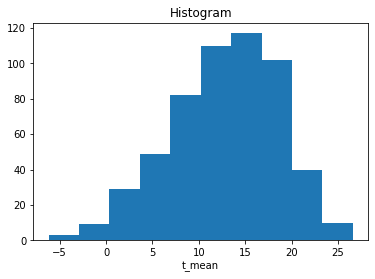

In [11]:
cats_and_dogs.t_mean.plot.hist()

In [13]:
random = np.zeros(10000)
for i in range(len(random)):    
    random[i] = np.random.choice(t_daily.t_mean, size=len(cats_and_dogs.precip)).mean() 

(array([1.400e+01, 1.210e+02, 6.900e+02, 2.076e+03, 3.170e+03, 2.583e+03,
        1.098e+03, 2.190e+02, 2.700e+01, 2.000e+00]),
 array([ 8.23901996,  8.523049  ,  8.80707804,  9.09110708,  9.37513612,
         9.65916515,  9.94319419, 10.22722323, 10.51125227, 10.79528131,
        11.07931034]),
 <BarContainer object of 10 artists>)

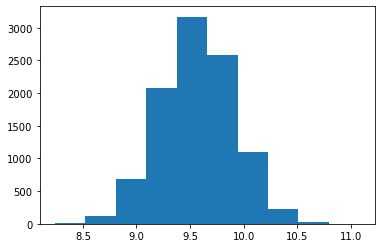

In [26]:
plt.hist(random)

In [27]:
print('Original Mean Temp: %2.1f °C' %(cats_and_dogs.t_mean.mean().values))
print('Bootstrapped Mean Temp: %2.1f °C' %(random.mean()))
print('2.5% and 97.5% Quantile Temp: ', np.quantile(random, (0.025, 0.975)), ' °C')

Original Mean Temp: 12.9 °C
Bootstrapped Mean Temp: 9.6 °C
2.5% and 97.5% Quantile Temp:  [ 8.90017241 10.22686479]  °C
